In [2]:
import pyflubl
import IPAC_2025
import matplotlib.pyplot as _plt

m = IPAC_2025.test_IPAC_2025()

MakeFlukaCustomFluka


Read 1 detectors
Statistics present


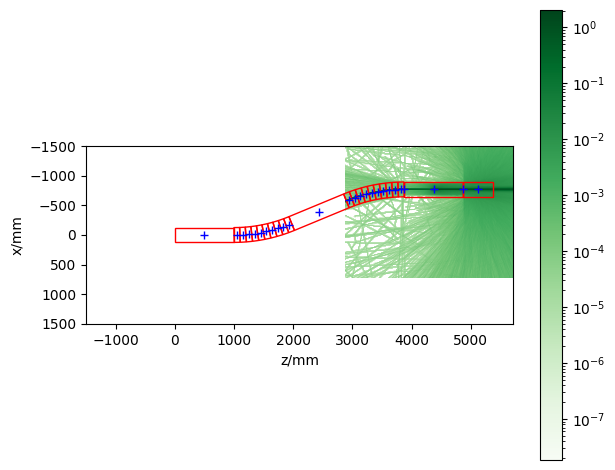

In [3]:
d = pyflubl.Analysis.openFile("./run_IPAC_2025/temp.bnn","usrbin")
bk = pyflubl.Analysis.openBookkeepingFile("IPAC_2025.json")
pyflubl.Analysis.plot_usrbin(d,detector_idx=0,projection=1,bookkeeping=bk)
pyflubl.Analysis.plot_machine_xz(m)
_plt.colorbar()

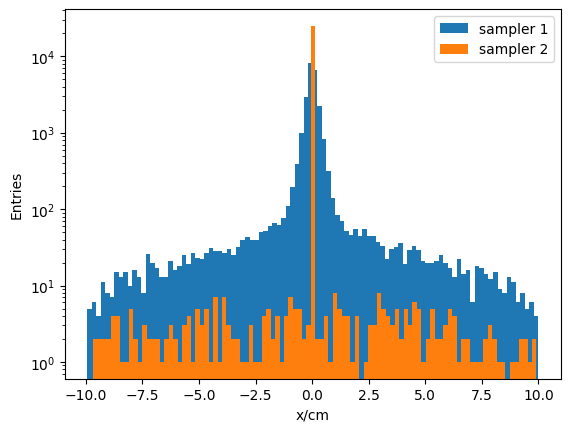

In [125]:
import numpy
import uproot
import awkward as ak


file_names = ["./run_IPAC_2025/IPAC_2025001_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025002_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025003_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025004_pyflubl.root",
              "./run_IPAC_2025/IPAC_2025005_pyflubl.root"]

trees = [uproot.open(f)["event"] for f in file_names]

arrays = [tree["s1.x"].array() for tree in trees]
s1_x_all = numpy.ravel(ak.concatenate(arrays))

arrays = [tree["s2.x"].array() for tree in trees]
s2_x_all = numpy.ravel(ak.concatenate(arrays))

_plt.hist(s2_x_all[abs(s2_x_all) < 10],100, label="sampler 1");
_plt.hist(s1_x_all[abs(s1_x_all) < 10],100, label="sampler 2");

_plt.xlabel("x/cm")
_plt.ylabel("Entries")

_plt.semilogy();
_plt.legend()